<a href="https://colab.research.google.com/github/bgoueti/Data-Science-BloomTech/blob/main/LS_DS_214_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BloomTech Data Science

*Unit 2, Sprint 1, Module 4*

---

# Module Project: Logistic Regression

Do you like burritos? 🌯 You're in luck then, because in this project you'll create a model to predict whether a burrito is `'Great'`.

The dataset for this assignment comes from [Scott Cole](https://srcole.github.io/100burritos/), a San Diego-based data scientist and burrito enthusiast.

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function .
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline accuracy score for your dataset.
- **Task 6:** Build `model_logr` using a pipeline that includes three transfomers and `LogisticRegression` predictor. Train model on `X_train` and `X_test`.
- **Task 7:** Calculate the training and test accuracy score for your model.
- **Task 8:** Create a horizontal bar chart showing the 10 most influencial features for your  model.
- **Task 9:** Demonstrate and explain the differences between `model_lr.predict()` and `model_lr.predict_proba()`.

**Note**

You should limit yourself to the following libraries:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [44]:
## In case of using Category Encoder install first as follw below
%%capture
!pip install category_encoders==2.*
from category_encoders import OneHotEncoder

# Model Building
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# For running this notebook either loclly or in colab
import sys

In [45]:
def wrangle(filepath):
    # Import w/ DateTimeIndex
    df = pd.read_csv(filepath, parse_dates=['Date'],
                     index_col='Date')

    # Drop unrated burritos
    df.dropna(subset=['overall'], inplace=True)

    # Derive binary classification target:
    # We define a 'Great' burrito as having an
    # overall rating of 4 or higher, on a 5 point scale
    df['Great'] = (df['overall'] >= 4).astype(int)

    # Drop high cardinality categoricals
    df = df.drop(columns=['Notes', 'Location', 'Address', 'URL'])

    # Properly encode binary columns as 0s and 1s
    binary_cols = ['Unreliable', 'NonSD', 'Beef', 'Pico', 'Guac', 'Cheese', 'Fries',
       'Sour cream', 'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice', 'Beans',
       'Lettuce', 'Tomato', 'Bell peper', 'Carrots', 'Cabbage', 'Sauce',
       'Salsa.1', 'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Ham',
       'Chile relleno', 'Nopales', 'Lobster', 'Queso', 'Egg', 'Mushroom',
       'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini']

    #Convert 'x' to 1 and NaN to 0
    df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if type(x)==str else 0)

    # Engineer new features based on the 'Burrito' column
    borrito_list = ['california', 'asada', 'surf', 'carnitas']

    for b in borrito_list:
      df[b] = df['Burrito'].str.lower().str.contains(b).astype(int)

    # Drop columns to prevent "leakage"
    df = df.drop(columns=['Rec', 'overall', 'Burrito'])

    return df


In [46]:
filepath = "https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Linear-Models/master/data/burritos/burritos.csv"

#df = pd.read_csv(filepath)
#df.head()

**Task 1:** Use the above `wrangle` function to import the `burritos.csv` file into a DataFrame named `df`.

In [47]:
df = wrangle(filepath)
#df.head()

In [48]:
df.shape

(421, 63)

In [49]:
#df.info()

During your exploratory data analysis, note that there are several columns whose data type is `object` but that seem to be a binary encoding. For example, `df['Beef'].head()` returns:

```
0      x
1      x
2    NaN
3      x
4      x
Name: Beef, dtype: object
```

**Task 2:** Change the `wrangle` function so that these columns are properly encoded as `0` and `1`s. Be sure your code handles upper- and lowercase `X`s, and `NaN`s.

In [50]:
# # Properly encode binary columns as 0s and 1s
  #  binary_cols = ['Sour cream', 'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice', 'Beans',
   #    'Lettuce', 'Tomato', 'Bell peper', 'Carrots', 'Cabbage', 'Sauce',
   #    'Salsa.1', 'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Ham',
   #    'Chile relleno', 'Nopales', 'Lobster', 'Queso', 'Egg', 'Mushroom',
   #    'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini']

#df[binary_cols].applymap(lambda x: 1 if type(x) == str else 0).head()

In [51]:
# Conduct your exploratory data analysis here
# And modify the `wrangle` function above.

df.iloc[:, 22:-1].columns

Index(['NonSD', 'Beef', 'Pico', 'Guac', 'Cheese', 'Fries', 'Sour cream',
       'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice', 'Beans', 'Lettuce',
       'Tomato', 'Bell peper', 'Carrots', 'Cabbage', 'Sauce', 'Salsa.1',
       'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Ham', 'Chile relleno',
       'Nopales', 'Lobster', 'Queso', 'Egg', 'Mushroom', 'Bacon', 'Sushi',
       'Avocado', 'Corn', 'Zucchini', 'Great', 'california', 'asada', 'surf'],
      dtype='object')

If you explore the `'Burrito'` column of `df`, you'll notice that it's a high-cardinality categorical feature. You'll also notice that there's a lot of overlap between the categories.

**Stretch Goal:** Change the `wrangle` function above so that it engineers four new features: `'california'`, `'asada'`, `'surf'`, and `'carnitas'`. Each row should have a `1` or `0` based on the text information in the `'Burrito'` column. For example, here's how the first 5 rows of the dataset would look.

| **Burrito** | **california** | **asada** | **surf** | **carnitas** |
| :---------- | :------------: | :-------: | :------: | :----------: |
| California  |       1        |     0     |    0     |      0       |
| California  |       1        |     0     |    0     |      0       |
|  Carnitas   |       0        |     0     |    0     |      1       |
| Carne asada |       0        |     1     |    0     |      0       |
| California  |       1        |     0     |    0     |      0       |

**Note:** Be sure to also drop the `'Burrito'` once you've engineered your new features.

In [52]:
# Conduct your exploratory data analysis here
# And modify the `wrangle` function above.

In [53]:
# Engineer new features based on the 'Burrito' column

#df['california'] = df['Burrito'].apply(lambda x: 1 if 'california' in x.lower() else 0)
#df['asada'] = df['Burrito'].apply(lambda x: 1 if 'asada' in x.lower() else 0)
#df['surf'] = df['Burrito'].apply(lambda x: 1 if 'surf' in x.lower() else 0)
#df['carnitas'] = df['Burrito'].apply(lambda x: 1 if 'carnitas' in x.lower() else 0)

#borrito_list = ['california', 'asada', 'surf', 'carnitas']

#for b in borrito_list:
#  df[b] = df['Burrito'].str.lower().contains(b).astype(int)

# Drop the 'Burrito' column
#df = df.drop(columns=['Burrito'])

In [54]:
df.head()

,Neighborhood,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,...,Bacon,Sushi,Avocado,Corn,Zucchini,Great,california,asada,surf,carnitas
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-18,Miramar,3.5,4.2,NaN,6.49,3.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2016-01-24,San Marcos,3.5,3.3,NaN,5.45,3.5,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2016-01-24,NaN,NaN,NaN,NaN,4.85,1.5,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2016-01-24,NaN,NaN,NaN,NaN,5.25,2.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
2016-01-27,Carlsbad,4.0,3.8,x,6.59,4.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0


# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'Great'`.

In [55]:
target = 'Great'

X = df.drop(columns = target)
y = df[target]

In [56]:
X.index

DatetimeIndex(['2016-01-18', '2016-01-24', '2016-01-24', '2016-01-24',
               '2016-01-27', '2016-01-28', '2016-01-30', '2016-01-30',
               '2016-02-01', '2016-02-06',
               ...
               '2019-08-24', '2019-08-27', '2019-08-27', '2019-08-27',
               '2019-08-27', '2019-08-27', '2019-08-27', '2019-08-27',
               '2019-08-27', '2019-08-27'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from 2016 through 2017.
- Your test set should include data from 2018 and later.

In [57]:
cutoff = '2018'

mask = X.index < cutoff

X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

# III. Establish Baseline

**Task 5:** Since this is a **classification** problem, you should establish a baseline accuracy score. Figure out what is the majority class in `y_train` and what percentage of your training observations it represents.

In [58]:
y_train.value_counts(normalize = True).max()

0.5822454308093995

In [59]:
baseline_acc = y_train.value_counts(normalize = True).max()
print('Baseline Accuracy Score:', baseline_acc)

Baseline Accuracy Score: 0.5822454308093995


# IV. Build Model

**Task 6:** Build a `Pipeline` named `model_logr`, and fit it to your training data. Your pipeline should include:

- a `OneHotEncoder` transformer for categorical features,
- a `SimpleImputer` transformer to deal with missing values,
- a [`StandarScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) transfomer (which often improves performance in a logistic regression model), and
- a `LogisticRegression` predictor.

In [60]:
model_logr = make_pipeline(OneHotEncoder(use_cat_names = True),
                           SimpleImputer(),
                           StandardScaler(),
                           LogisticRegression())
model_logr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Neighborhood', 'Chips', 'Reviewer'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

# IV. Check Metrics

**Task 7:** Calculate the training and test accuracy score for `model_logr`.

In [61]:
training_acc = model_logr.score(X_train, y_train)
test_acc = model_logr.score(X_test, y_test)

print('Training MAE:', training_acc)
print('Test MAE:', test_acc)

Training MAE: 0.97911227154047
Test MAE: 0.7894736842105263


# V. Communicate Results

**Task 8:** Create a horizontal barchart that plots the 10 most important coefficients for `model_lr`, sorted by absolute value.

**Note:** Since you created your model using a `Pipeline`, you'll need to use the [`named_steps`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) attribute to access the coefficients in your `LogisticRegression` predictor. Be sure to look at the shape of the coefficients array before you combine it with the feature names.

/usr/local/lib/python3.10/dist-packages/category_encoders/utils.py:366: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


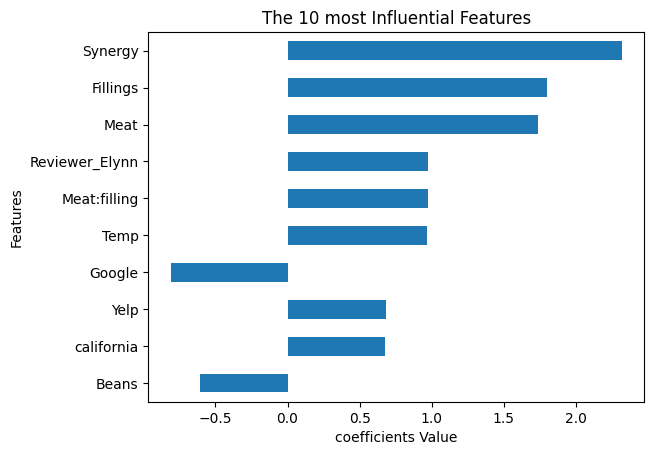

In [62]:
# Create your horizontal barchart here.
coefficients = model_logr.named_steps['logisticregression'].coef_[0]
features = model_logr.named_steps['onehotencoder'].get_feature_names()

#print(coefficients)
#print(features)

feat_imp = pd.Series(coefficients, index = features).sort_values(key = abs)
feat_imp.tail(10).plot(kind = 'barh')
plt.xlabel('coefficients Value')
plt.ylabel('Features')
plt.title('The 10 most Influential Features');

There is more than one way to generate predictions with `model_lr`. For instance, you can use [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression) or [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression.predict_proba).

**Task 9:** Generate predictions for `X_test` using both `predict` and `predict_proba`. Then below, write a summary of the differences in the output for these two methods. You should answer the following questions:

- What data type do `predict` and `predict_proba` output?
- What are the shapes of their different output?
- What numerical values are in the output?
- What do those numerical values represent?

In [63]:
# Write code here to explore the differences between `predict` and `predict_proba`.

#model_logr.predict(X_test)
#np.round(model_logr.predict_proba(X_test), 2)

In [64]:
# Generate predictions using predict
predictions = model_logr.predict(X_test)

# Generate predictions using predict_proba
probabilities = np.round(model_logr.predict_proba(X_test), 2)

# Summary of differences
print("Output of predict():")
print("Data type:", predictions.dtype)
print("Shape:", predictions.shape)
print("Numerical values:", predictions)
print("Predicted class labels (0 or 1)")

print("\nOutput of predict_proba():")
print("Data type:", probabilities.dtype)
print("Shape:", probabilities.shape)
print("Numerical values:", probabilities)
print("Probability estimates for each class")

Output of predict():
Data type: int64
Shape: (38,)
Numerical values: [1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1
 1]
Predicted class labels (0 or 1)

Output of predict_proba():
Data type: float64
Shape: (38, 2)
Numerical values: [[0.   1.  ]
 [0.   1.  ]
 [0.99 0.01]
 [0.   1.  ]
 [1.   0.  ]
 [0.86 0.14]
 [0.03 0.97]
 [0.   1.  ]
 [0.   1.  ]
 [0.07 0.93]
 [0.31 0.69]
 [1.   0.  ]
 [0.55 0.45]
 [0.39 0.61]
 [0.02 0.98]
 [0.01 0.99]
 [0.05 0.95]
 [1.   0.  ]
 [0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 [0.01 0.99]
 [0.95 0.05]
 [0.07 0.93]
 [0.32 0.68]
 [0.81 0.19]
 [1.   0.  ]
 [0.   1.  ]
 [0.07 0.93]
 [0.   1.  ]
 [0.99 0.01]
 [0.09 0.91]
 [0.01 0.99]
 [1.   0.  ]
 [0.31 0.69]
 [0.17 0.83]
 [0.   1.  ]
 [0.01 0.99]]
Probability estimates for each class


**Give your written answer here:**

```


```
